# 개요

- 출처
  - 원본 데이터 셋
    - [Paris Housing Price Prediction](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)
  - 경진 대회 데이터 셋
    - [Paris Housing Price](https://www.kaggle.com/competitions/playground-series-s3e6/overview) 
- 내용 : 교육 목적, 실습 및 필요한 지식 습득을 위한  파리의 가상 집값 데이터에서 생성된 데이터 셋
- 평가지표 : RMSE 
- 타임라인 : 2023.2.7 ~ 2023.2.20

## 데이터 준비 및 확인

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/2차_실기평가/2차_모듈/회귀/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

In [248]:
origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 17), (15154, 16), (15154, 1))

In [249]:
print(origin.columns)
print(train.columns)
print(test.columns)
print(submission.columns)
# price 변수를 제외하고 컬럼명 동일

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom'],
      dtype='object')
Index(['price'], dtype='object')


```
< 각 속성 확인 >
'id', : 고유 ID -> 확인 결과 id 컬럼은 인덱스정도 의미를 가진다 ( 컬럼 제거 가능 )
'squareMeters', : 방 면적 넓이 ( 연속형 )
'numberOfRooms', : 방 개수 ( 연속형 )
'hasYard', : 마당 존재 여부  ( 이진형 : 0,1 )
'hasPool', : 수영장 존재 여부 ( 이진형 : 0,1 )
'floors', : 층 수 ( 이산형 )
'cityCode', : 건물 구별 고유 코드 
'cityPartRange', : 지역구로 추정 ( 범주형 : 1 ~ 10 )
'numPrevOwners', : 이전 집 소유자 거친 횟수 ( 이산형 )
'made', : 제작연도 ( 범주형 )
'isNewBuilt',: 리빌딩 여부 ( 이진형 : 0,1 )
'hasStormProtector', : 태풍 보호기 설치 여부 ( 이진형 : 0,1 )
'basement', : 지하실 면적 넓이 (연속형)
'attic', : 다락방 면적 넓이 (연속형)
'garage', : 주차장 크기 (연속형)
'hasStorageRoom', : 창고 여부 ( 이진형 : 0,1 )
'hasGuestRoom', : 게스트 룸 개수 ( 이산형 )
'price' : 종속변수(Target), 시세 예측값
```

In [250]:
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
id,,,,,,,,,,,,,,,,,
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4


In [251]:
train.info()
# 결측값 없음 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

In [252]:
test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
id,,,,,,,,,,,,,,,,
22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10


In [253]:
test.info()
# 결측값 없음 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15154 entries, 22730 to 37883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       15154 non-null  int64
 1   numberOfRooms      15154 non-null  int64
 2   hasYard            15154 non-null  int64
 3   hasPool            15154 non-null  int64
 4   floors             15154 non-null  int64
 5   cityCode           15154 non-null  int64
 6   cityPartRange      15154 non-null  int64
 7   numPrevOwners      15154 non-null  int64
 8   made               15154 non-null  int64
 9   isNewBuilt         15154 non-null  int64
 10  hasStormProtector  15154 non-null  int64
 11  basement           15154 non-null  int64
 12  attic              15154 non-null  int64
 13  garage             15154 non-null  int64
 14  hasStorageRoom     15154 non-null  int64
 15  hasGuestRoom       15154 non-null  int64
dtypes: int64(16)
memory usage: 2.0 MB


In [254]:
origin

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [255]:
origin.info()
# 대부분 확인 시 모든 컬럼이 수치형으로 되어있음
# 결측값 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [256]:
submission
# 기본값 4634456.897

,price
id,
22730,4634456.897
22731,4634456.897
22732,4634456.897
22733,4634456.897
22734,4634456.897
...,...
37879,4634456.897
37880,4634456.897
37881,4634456.897


# 초기 파악

## 결측치 확인

In [257]:
# 참고 :  https://plotly.com/python-api-reference/

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def null_per(df):
    return (df.isnull().sum() / len(df)*100).sort_values(ascending=False)

plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Original Dataset", "Training Dataset","Test Dataset"))

null_per_origin = null_per(origin)
null_per_train = null_per(train)
null_per_test = null_per(test)

print(null_per_origin)
fig.add_trace(
    go.Bar(x=null_per_origin.index, y=null_per_origin.values),
    row=1, col=1
)

print(null_per_train)

fig.add_trace(
    go.Bar(x=null_per_train.index, y=null_per_train.values),
    row=1, col=2
)

print(null_per_test)

fig.add_trace(
    go.Bar(x=null_per_test.index, y=null_per_test.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 결측치 없음

squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors              

<Figure size 432x288 with 0 Axes>

## 고유값 확인

In [258]:
plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "For Training Dataset","For Test Dataset"))

temp_data= origin.nunique().sort_values()
print(temp_data)
fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp2_data= train.nunique().sort_values()
print(temp2_data)

fig.add_trace(
    go.Bar(x=temp2_data.index, y=temp2_data.values),
    row=1, col=2
)

temp3_data= test.nunique().sort_values()
print(temp3_data)

fig.add_trace(
    go.Bar(x=temp3_data.index, y=temp3_data.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 분포 확인 시 별 차이가 안 보인다
# hasYard, hasPool, hasStorageRoom, isNewBuilt, hasStormProtector는 이진형이다

hasYard                  2
hasPool                  2
hasStorageRoom           2
isNewBuilt               2
hasStormProtector        2
cityPartRange           10
numPrevOwners           10
hasGuestRoom            11
made                    32
numberOfRooms          100
floors                 100
garage                 901
attic                 6267
basement              6352
squareMeters          9483
cityCode              9509
price                10000
dtype: int64
hasYard                 2
hasPool                 2
hasStorageRoom          2
isNewBuilt              2
hasStormProtector       2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   33
numberOfRooms         100
floors                101
garage                896
basement             4903
attic                5167
squareMeters         7319
price                7421
cityCode             7810
dtype: int64
hasYard                 2
hasPool                 2
isNewBuilt           

<Figure size 432x288 with 0 Axes>

## 중복값 확인

In [259]:
train.shape, train.drop_duplicates().shape

((22730, 17), (22730, 17))

In [260]:
test.shape, test.drop_duplicates().shape

((15154, 16), (15154, 16))

In [261]:
origin.shape, origin.drop_duplicates().shape

((10000, 17), (10000, 17))

## 데이터 요약

In [262]:
train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [263]:
test.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


In [264]:
origin.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## 전체 요약 (함수화 처리)

In [265]:
def summary(df, train=train):
    print(f'data shape: {df.shape}')
    sum_df = pd.DataFrame(df.dtypes, columns=['type'])
    sum_df['null'] = df.isnull().sum().values * 100
    #sum_df['missing_per'] = df.isnull().sum().values / len(df)
    sum_df['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    sum_df['min'] = desc['min'].values
    sum_df['max'] = desc['max'].values
    sum_df['mean'] = desc['mean'].values
    sum_df['first value'] = df.iloc[0].values
    sum_df['second value'] = df.iloc[1].values
    sum_df['third value'] = df.iloc[2].values
    
    return sum_df
summary_df = summary(train)
summary_df

data shape: (22730, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,7319,89.0,6071330.0,4.658622e+04,34291.0,95145.0,92661.0
numberOfRooms,int64,0,100,1.0,100.0,4.824109e+01,24.0,60.0,45.0
hasYard,int64,0,2,0.0,1.0,4.758909e-01,1.0,0.0,1.0
hasPool,int64,0,2,0.0,1.0,4.527497e-01,0.0,1.0,1.0
floors,int64,0,101,1.0,6000.0,4.730598e+01,47.0,60.0,62.0
cityCode,int64,0,7810,3.0,491100.0,5.001380e+04,35693.0,34773.0,45457.0
cityPartRange,int64,0,10,1.0,10.0,5.585042e+00,2.0,1.0,4.0
numPrevOwners,int64,0,10,1.0,10.0,5.620766e+00,1.0,4.0,8.0
made,int64,0,33,1990.0,10000.0,2.008005e+03,2000.0,2000.0,2020.0
isNewBuilt,int64,0,2,0.0,1.0,4.679718e-01,0.0,0.0,1.0


In [266]:
summary_df2 = summary(origin)
summary_df2

data shape: (10000, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,9483,89.0,99999.0,4.987013e+04,75523.0,80771.0,55712.0
numberOfRooms,int64,0,100,1.0,100.0,5.035840e+01,3.0,39.0,58.0
hasYard,int64,0,2,0.0,1.0,5.087000e-01,0.0,1.0,0.0
hasPool,int64,0,2,0.0,1.0,4.968000e-01,1.0,1.0,1.0
floors,int64,0,100,1.0,100.0,5.027630e+01,63.0,98.0,19.0
cityCode,int64,0,9509,3.0,99953.0,5.022549e+04,9373.0,39381.0,34457.0
cityPartRange,int64,0,10,1.0,10.0,5.510100e+00,3.0,8.0,6.0
numPrevOwners,int64,0,10,1.0,10.0,5.521700e+00,8.0,6.0,8.0
made,int64,0,32,1990.0,2021.0,2.005488e+03,2005.0,2015.0,2021.0
isNewBuilt,int64,0,2,0.0,1.0,4.991000e-01,0.0,1.0,0.0


- 오리지널 데이터와 비교 시, 차이가 나는 부분이 보인다.
  - squareMeters, floors, cityCode, made, basement, attic, garage


# EDA

- EDA 진행중 수행하는 시각화는 평면적인 데이터에서 주요 특성을 드러내는 효과적인 방법

- 데이터 종류 (복습)
 
|범주형(Categorical)|--|예시|특징|
|--|--|--|--|
|명목형(Nominal)|--|성별, 음식종류|순위가 없다.서열없다|
|순서형(Ordinal)|--|학점, 순위, 평점|순위를 매길수 있다. |
* 사칙연산이 가능한 데이터

|수치형(Numerical)|--|예시|특징|
|--|--|--|--|
|이산형(Discrete)|--|메뉴개수, 책개수|정수로 떨어지는 셀 수 있는 데이터, 소수점없음|
|연속형(Continous)|--|키,몸무게,집값|값이끊기지 않고 연속된 데이터, 소수점가능|
* 범주로 나눠지는 데이터

- [기초 통계 이해](https://m.blog.naver.com/dairum_enc/221409597367)
- [범주형,수치형,이상형,연속형,명목형,순서형 정리 - Unique Life](https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC)

In [267]:
# 앞 선 데이터셋 (기준) 요약을 통해서 데이터 유형을 분류해보았다.

# 범주형
features_cat = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom','hasGuestRoom']

# 수치형
features_num = ['squareMeters', 'numberOfRooms', 'floors', 'cityCode','cityPartRange', 'numPrevOwners', 'made','basement', 'attic', 'garage']

# 이진형
features_bin = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom']

# 연속형
features_cont=['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage' ]

# 이산형 
features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

# 종속변수
target = 'price'

## Target 분포 확인

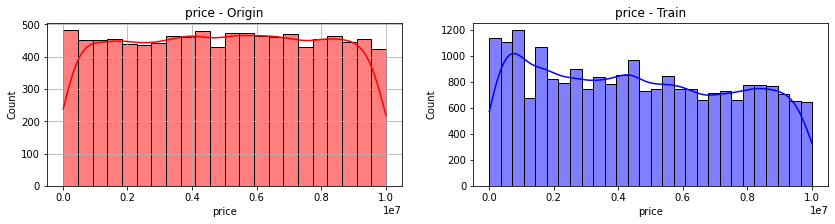

In [268]:
plt.figure(figsize=(14,3))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=origin[target], color='r', kde=True)
plt.title(target + ' - Origin')
plt.grid()
ax2 = plt.subplot(1,2,2)
sns.histplot(x=train[target], color='b', kde=True)
plt.title(target + ' - Train')
plt.show()

# 가격대의 분포가 다양하다

## Histogram

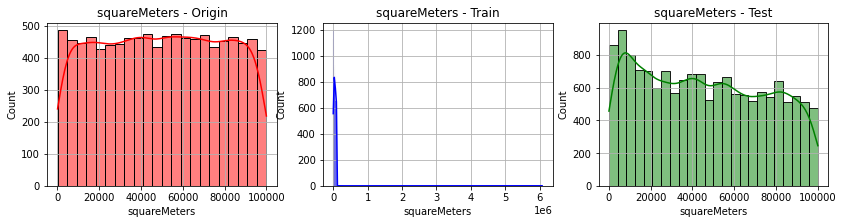

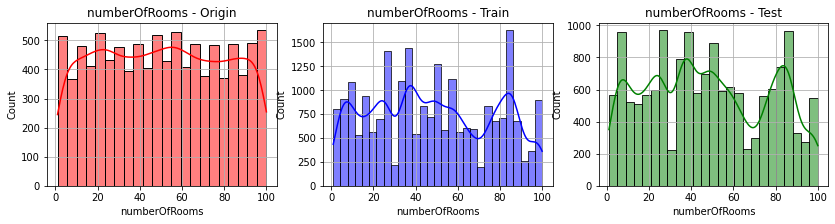

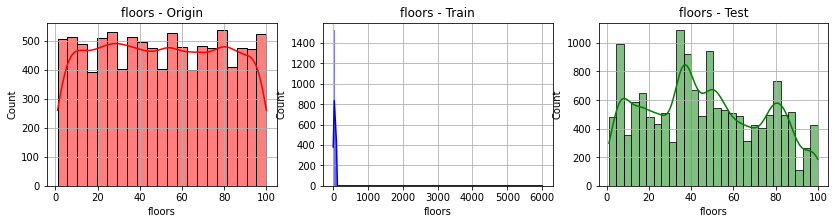

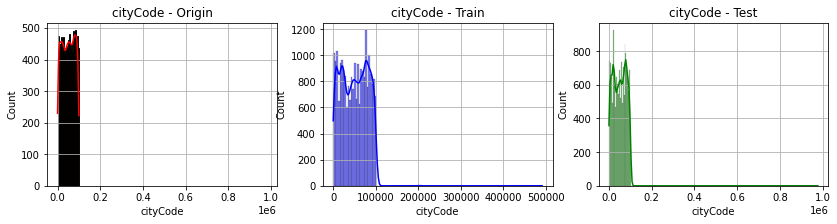

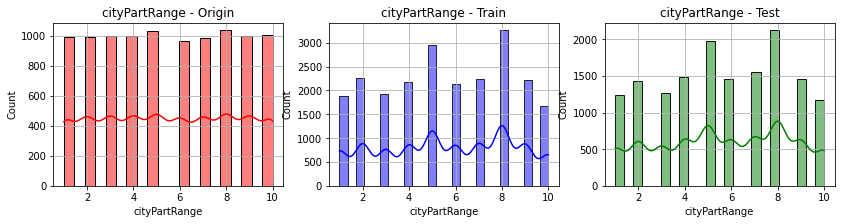

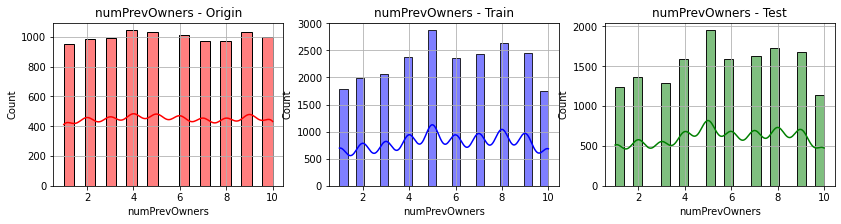

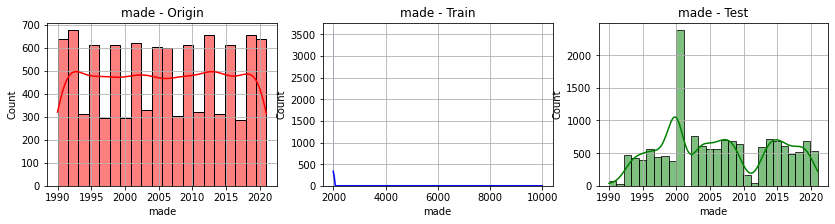

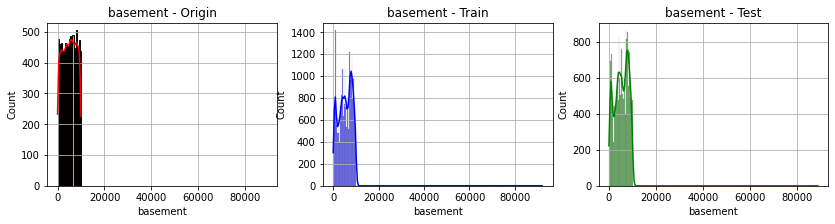

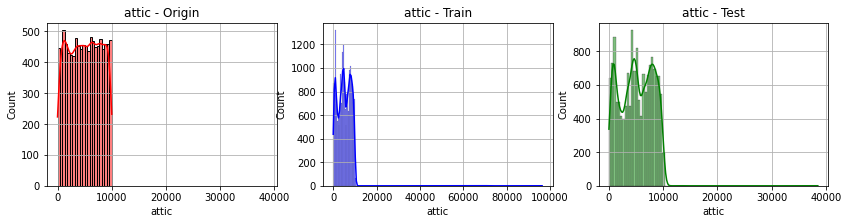

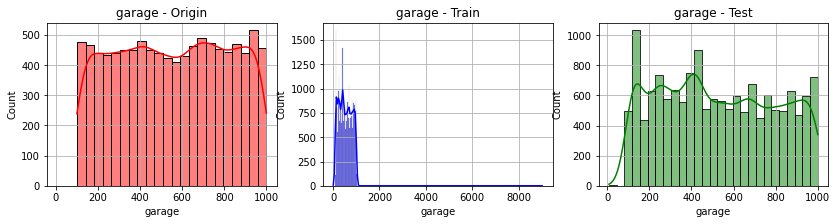

In [269]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=origin[f], color='r', kde=True)
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=train[f], color='b', kde=True)
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=test[f],color='g', kde=True)
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 확인 시 train,test에서 이상치로 보여 한 곳으로 밀집되는 경우가 있다. -> 비대칭(skewed) 데이터를 처리하는 3가지 방법 / Skewed Data https://dining-developer.tistory.com/18

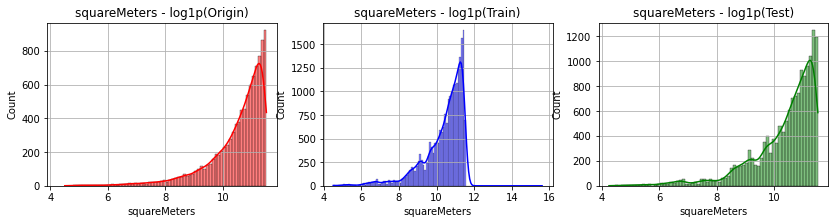

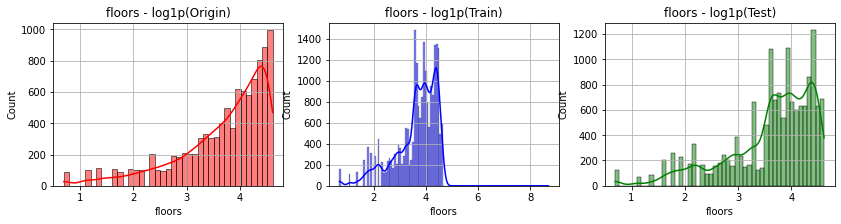

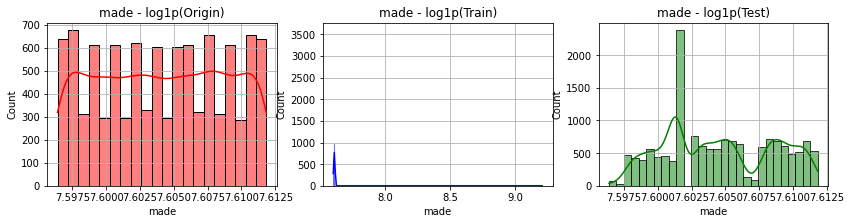

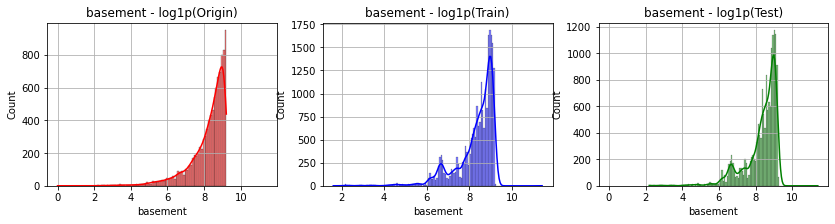

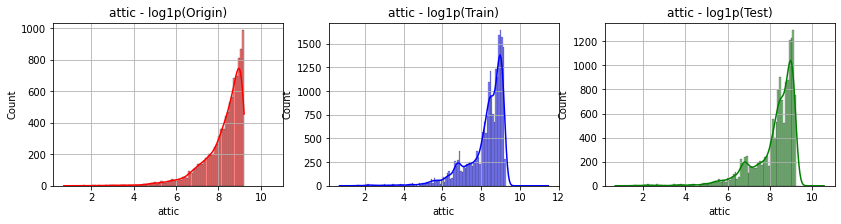

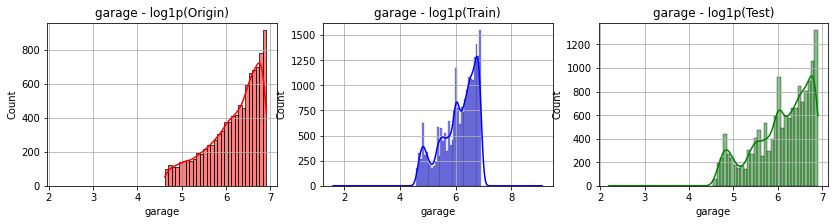

In [270]:
# 위에서 보인 비대칭 분포를 log 처리하여 분포를 확인해보자[https://steadiness-193.tistory.com/224] > 분포에 별 차이가 없다.
features_cont_log = ['squareMeters', 'floors','made', 'basement', 'attic', 'garage']

for f in features_cont_log:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=np.log1p(origin[f]), color='r', kde=True)
  plt.title(f + ' - log1p(Origin)')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=np.log1p(train[f]), color='b', kde=True)
  plt.title(f + ' - log1p(Train)')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=np.log1p(test[f]),color='g', kde=True)
  plt.title(f + ' - log1p(Test)')
  plt.grid()
  plt.show()

## Boxplot

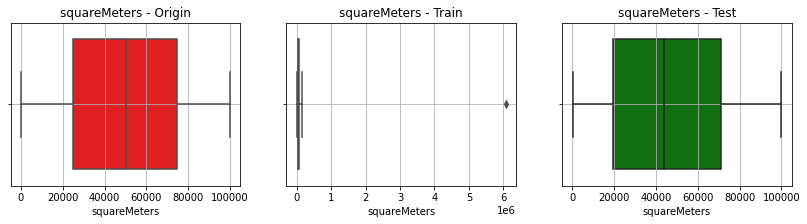

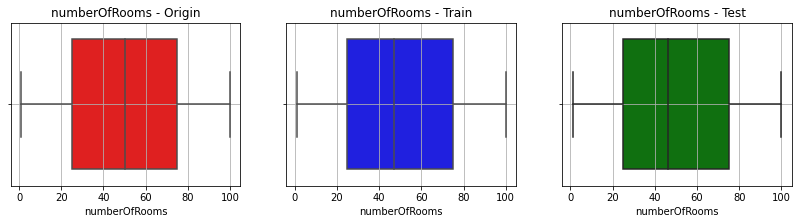

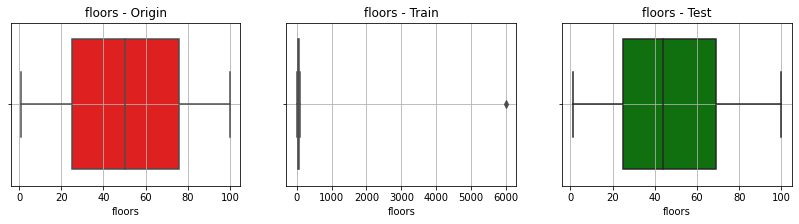

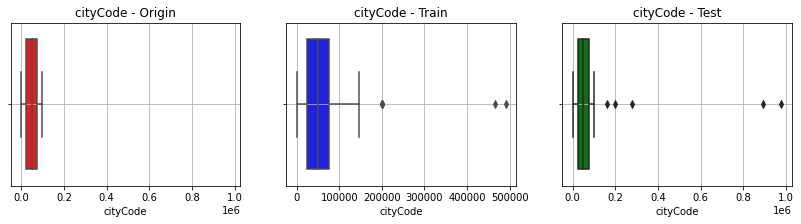

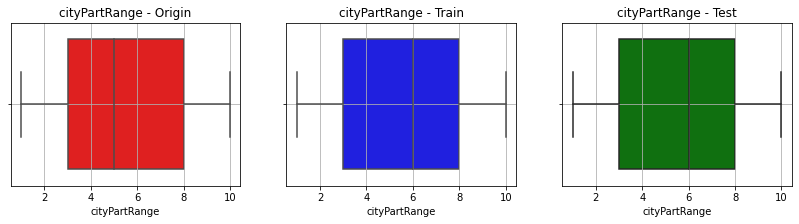

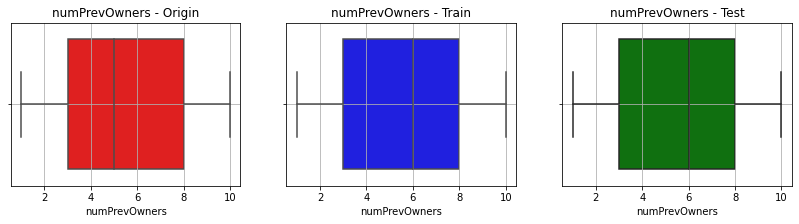

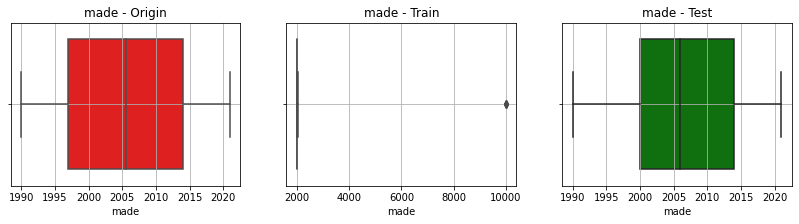

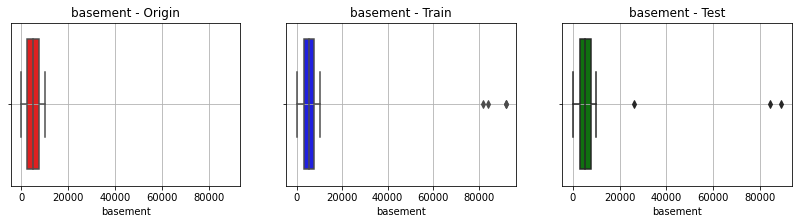

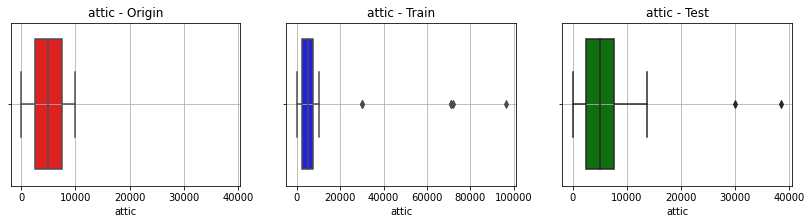

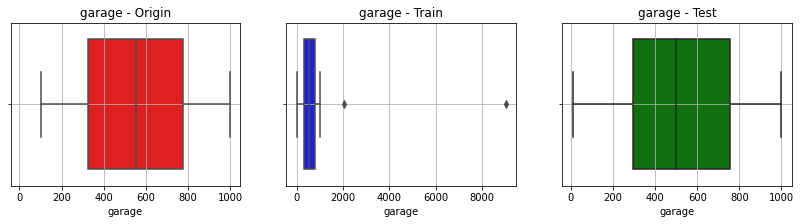

In [271]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.boxplot(x=origin[f], color='r')
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.boxplot(x=train[f], color='b')
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.boxplot(x=test[f],color='g')
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 원본에는 이상치 X, train/test이상치가 존재하는 것이 확인 -> squareMeter, floors, citycode, made, basement, attic, garage
# 다만 test 데이터 셋에서는 citycode, basement, attic 만 해당 됨 

## Countplot 

<ipython-input-272-af8c264576ab>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-272-af8c264576ab>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-272-af8c264576ab>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



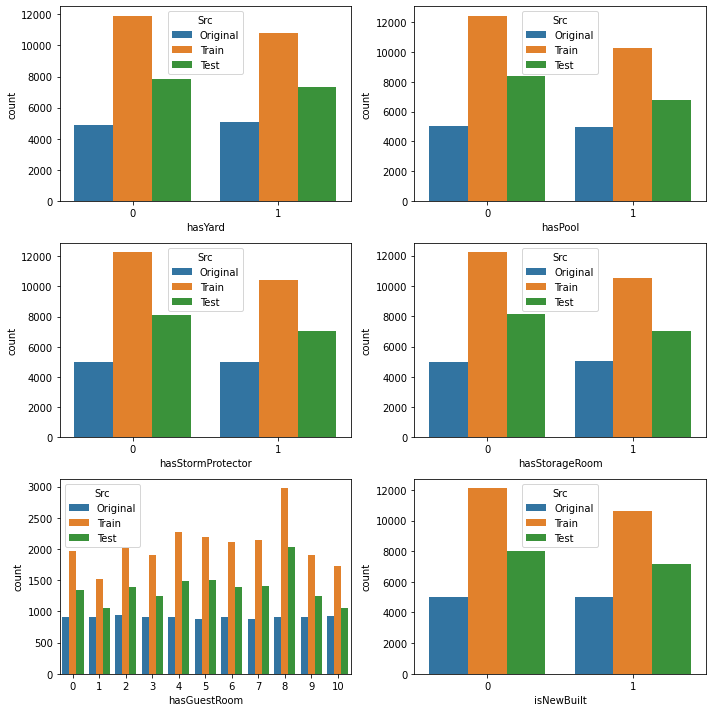

In [272]:
import math

features_dis=['hasYard', 'hasPool' ,'hasStormProtector','hasStorageRoom','hasGuestRoom', 'isNewBuilt']

t1 = origin[features_dis]

# hue 값 설정 하기 위해 src이라는 새로운 열 생성 
t1['Src'] = 'Original'

t2 = train[features_dis]
t2['Src'] = 'Train'

t3 = test[features_dis]
t3['Src'] = 'Test'

t4 = pd.concat([t1,t2,t3]).reset_index(drop=True)

y=2
# 파이썬 올림, 내림 함수:  https://ooyoung.tistory.com/99
x = math.ceil((len(features_dis)-1)/y)

# nrows = x, ncols = y
plt.subplots(x, y, figsize=(10,10))

for i in range(1,len(features_dis)+1) :

    # 하위 서브 플롯
    plt.subplot(x, y, i)
    sns.countplot(data=t4, x=features_dis[i-1], hue='Src');

plt.tight_layout()    
plt.show()

# 모든 열의 비슷한 비율이 관찰되며 train/test 데이터 셋이 

# 데이터 관계 시각화

## Heatmap

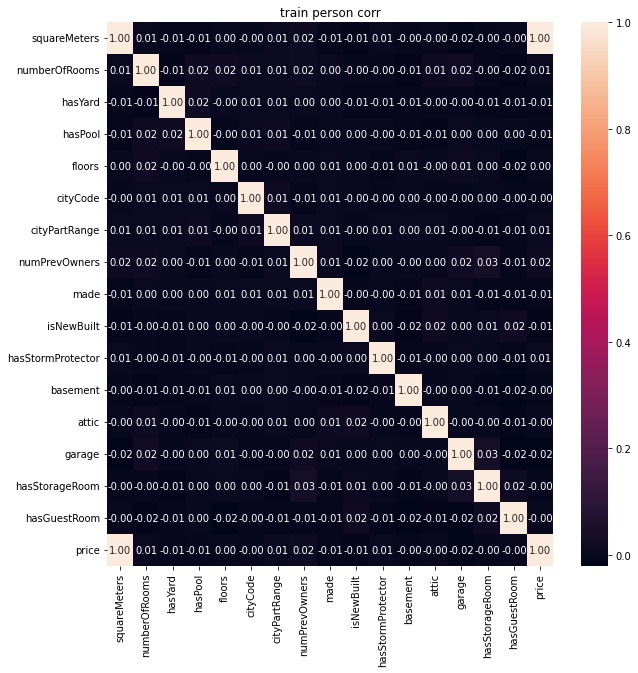

In [273]:
plt.figure(figsize=(10,10))
sns.heatmap(origin.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeter를 제외하고 다 약한 상관관계를 가지고 있다.

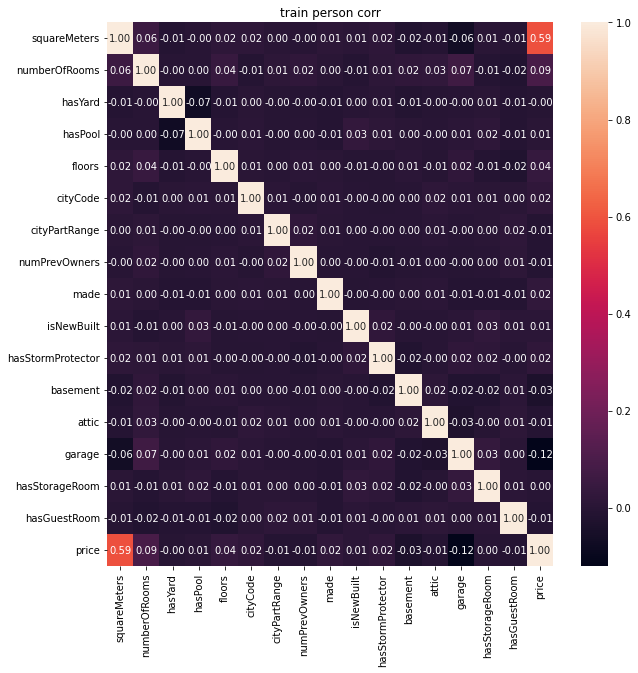

In [274]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeter를 제외하고 다 약한 상관관계를 가지고 있다.

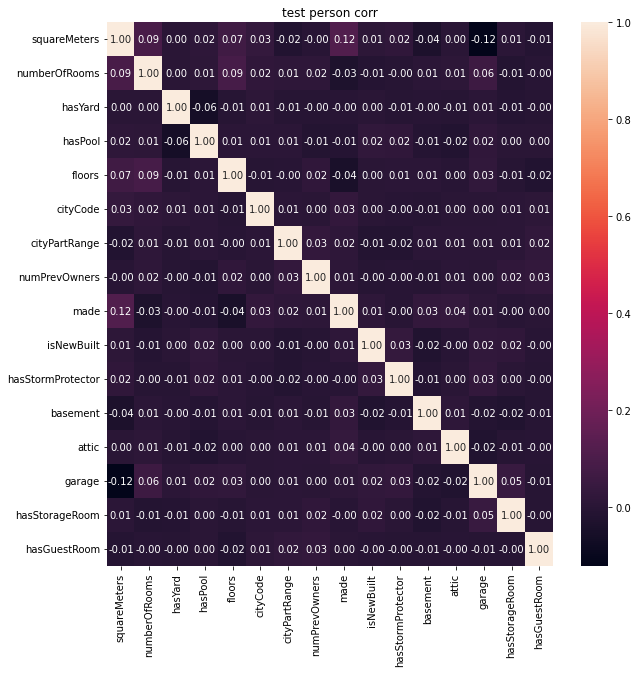

In [275]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("test person corr")
plt.show()

# 상관관계가 보이지 않음

## Regplot

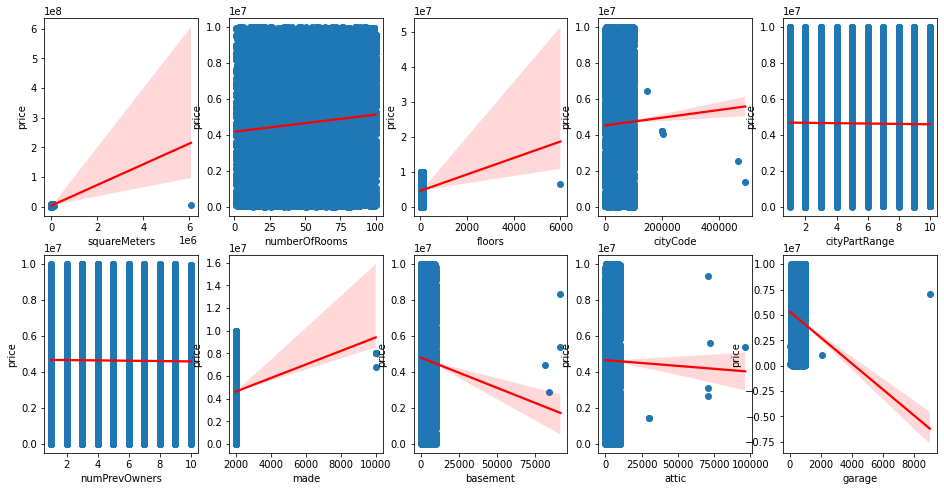

In [276]:
fig, axes = plt.subplots(figsize=(16,8), ncols=5, nrows=2)

for i, feature in enumerate(features_cont):
    row = int(i/5) 
    col = int(i%5)
    sns.regplot(x=feature,y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# 연속형 확인 시 squareMeters, floor, made가 어느정도 선형이 보임

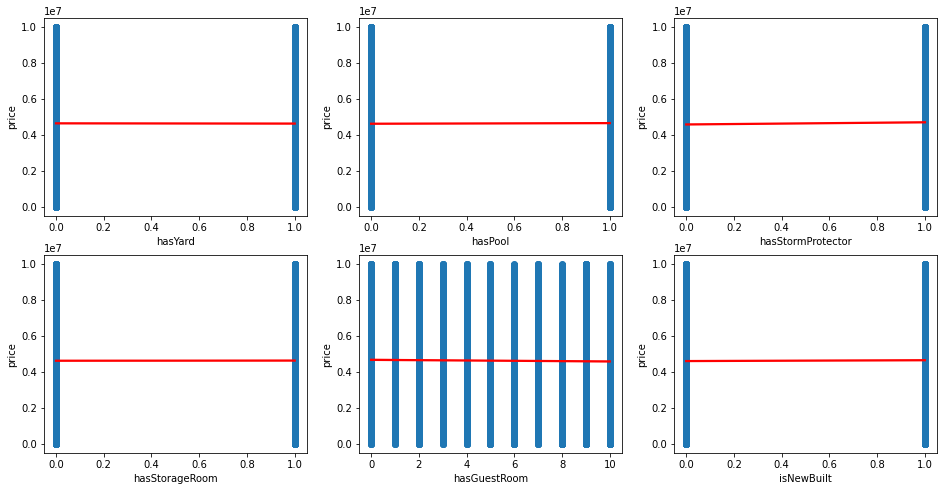

In [277]:
fig, axes = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

for i, feature in enumerate(features_dis):
    row = int(i/3) 
    col = int(i%3)
    sns.regplot(x=feature, y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.show()

# EDA 결과

- origin/train/test 데이터 셋에서는 결측치는 X 
- Boxplot 확인 시, train/test 데이터 셋에서 이상치는 다음과 같다 : squareMeters, floors, cityCode, made, basement, attic, garage는 
- Heatmap 확인 시 squaremeter 제외하고 다 약한 상관관계를 가지고 있다.
- Regplot 확인 시, basement, attic, garage는 price을 예측 시 도움이 되지 않는다


# 베이스라인 모델 구축



In [278]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/cloud_ai/2차_실기평가/2차_모듈/회귀/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 18), (15154, 17), (15154, 2))

# 피처 엔지니어링

In [279]:
# ID :  인덱스로 대체 가능 -> 제거
train.drop(columns=['id'],inplace=True)
test.drop(columns=['id'],inplace=True)

print(train.shape, test.shape)
train

(22730, 17) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


## 이상치 탐지 ( IQR )

- 앞 선 boxplot을 통해서 이상치를 확인 할 수 있었다. -> 이상치가 있는 특성만 따로 뽑아서 확인
  -  함수화 처리 참고 :  [IQR을 이용하여 이상치를 탐색하고 처리하기](https://hong-yp-ml-records.tistory.com/15)

In [280]:
# 이상치 탐지 ( 전체 부분 )
from collections import Counter

features_out = ['squareMeters', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage']

def detect_outliers(df,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25) # 백분위 25%
        Q3 = np.percentile(df[col], 75) # 백분위 75%
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR #?
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items())
    
        
    return multiple_outliers

In [281]:
Outliers_to_drop = detect_outliers(train, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
train.loc[Outliers_to_drop] 
# iqr 방식으로 모든 이상치를 확인 

Counter({15334: 1, 5659: 1, 299: 1, 1326: 1, 2425: 1, 10987: 1, 20735: 1, 22631: 1, 2113: 1, 3608: 1, 19124: 1, 19748: 1, 21400: 1, 2107: 1, 3995: 1, 15068: 1, 18926: 1, 3828: 1, 4909: 1, 12858: 1, 13633: 1, 13642: 1, 17168: 1, 19994: 1, 14878: 1, 17629: 1})
이상치 총 개수 26 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1


In [282]:
## 이상치 전부 제거 (보류)
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [283]:
Outliers_to_drop = detect_outliers(test, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
test.loc[Outliers_to_drop] 

# 테스트 셋 기준, iqr 방식으로 이상치는 cityCode, basement, attic에 있음 -> 제거 X 

Counter({4987: 1, 6503: 1, 8215: 1, 10525: 1, 13111: 1, 696: 1, 1789: 1, 11191: 1, 2838: 1, 9148: 1})
이상치 총 개수 10 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
4987,42211,51,0,1,13,200801,2,8,2008,1,0,874,9238,796,0,10
6503,95894,34,1,1,7,889795,6,9,2005,0,1,7381,75,582,0,6
8215,68824,8,0,1,34,977950,4,5,1990,0,0,6044,2097,665,1,7
10525,18368,22,0,1,71,279019,8,10,2000,0,1,6133,6642,289,1,4
13111,33156,35,1,0,77,162019,5,5,1994,0,0,1285,5075,814,1,6
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [284]:
# 이상치 탐지 함수 ( 특징 하나 씩 보도록 변경 )

def detect_outlier(df,feature):
  
  Q1 = np.percentile(df[feature], 25)
  Q3 = np.percentile(df[feature], 75)
  IQR = Q3 - Q1
        
  outlier_step = 1.5 * IQR
  
  return df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]

#### squareMeters ( 방 면적 넓이 )
  - Boxplot 확인 시 1e6 = 1000000
  - [면적순 나라 목록](https://ko.wikipedia.org/wiki/%EB%A9%B4%EC%A0%81%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D) 기준으로 보면 나라의 크기를 나타냄 -> <u>이상치 확실</u>
    - 6071330m^2 : 1836577.33 평 [ 평수 계산기 사용 시 ]


In [285]:
detect_outlier(train,'squareMeters')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9


In [286]:
train.squareMeters.sort_values(ascending=False)
# 면적이 높은 순으로 정렬 전에는 이상치가 6071330 하나만 확인되었으나 정렬시 146181도 추가 발견됨
# 확인 시 2개가 이상치로 되어 있다

15334    6071330
4741      146181
17330      99985
14864      99985
5261       99985
          ...   
2356          89
14879         89
12130         89
14314         89
13338         89
Name: squareMeters, Length: 22730, dtype: int64

In [287]:
train['squareMeters'].mode()

0    925
dtype: int64

In [288]:
# 이상치 제거 보다는 최대값으로 대체
#train.loc[train.index.isin([15334, 4741]), 'squareMeters'] = 99985

In [289]:
# 최빈값으로 대체 해보기 
train.loc[train.index.isin([15334, 4741]), 'squareMeters'] = 925

In [290]:
train.squareMeters.sort_values(ascending=False)
# 이상치 99985로 대체 완료 확인

13686    99985
5261     99985
14864    99985
17330    99985
648      99952
         ...  
14879       89
21718       89
14314       89
19926       89
6655        89
Name: squareMeters, Length: 22730, dtype: int64

#### floors ( 층 수 )
  - [런던·파리·뉴욕… 세계도 건물 높이 규제](https://www.seouland.com/arti/society/society_general/1609.html) 확인 시 최대 높이 기준 : 1973년 200m가 넘는 몽파르나스 타워(59층) ->  59층 이상도 이상치 인가? -> 확인 필요
  - Boxplot 확인 시 현재 존재하는 건물 들 중 6000층은 말이 안됨 -> <u>이상치 확실</u> 

In [291]:
# train[train.floors > 59]
# 데이터가 제거 시 데이터가 너무 적어짐 ->  방식 X

In [292]:
detect_outlier(train,'floors')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1


In [293]:
train['floors'].mode()

0    35
dtype: int64

In [294]:
train.loc[train.index.isin([5659]), 'floors'] = 35

In [295]:
#train.loc[train.index.isin([5659]), 'floors'] = 100
# 이상치를 최대값인 100층으로 대체함

In [296]:
train.floors.sort_values(ascending=False)
# 대체 확인 완료 

21304    100
20476    100
14822    100
10318    100
16203    100
        ... 
8511       1
2234       1
11605      1
19921      1
8085       1
Name: floors, Length: 22730, dtype: int64

### CityCode ( 도시 코드 )

- 임의로 만들어진 특성이므로 의미가 없다고 함 -> [cityCode is Fake!](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384676) -> 열 자체 삭제 권장

In [297]:
detect_outlier(train,'cityCode')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8


### made (제작년도) 

- 2021년도 기준으로 초과 시 미래 시간 (존재하지 않음) -> <u>이상치 확실

In [298]:
detect_outlier(train,'made')
# 이상치 10000년 확인됨 

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1
19124,80062,52,0,0,84,67099,9,4,10000,0,0,7677,5017,148,0,4,8007951.1
19748,80062,58,0,1,86,40408,7,8,10000,0,0,7059,7307,287,0,2,8007951.1
21400,80062,78,0,0,84,59457,4,7,10000,1,0,6382,9507,298,1,4,8007951.1


In [299]:
train['made'].mode()

0    2000
dtype: int64

In [300]:
#train.loc[train.index.isin([2113,3608,19124,19748,21400]), 'made'] = 2021
# 이상치를 최대값인 2021년도로 대체 

In [301]:
train.loc[train.index.isin([2113,3608,19124,19748,21400]), 'made'] = 2000

In [302]:
train.made.sort_values(ascending=False)
# 이상치 변경 확인 완료

11517    2021
2330     2021
13594    2021
17952    2021
7394     2021
         ... 
4180     1990
4965     1990
10022    1990
4201     1990
7609     1990
Name: made, Length: 22730, dtype: int64

### basement( 지하실 면적 넓이 )

In [303]:
detect_outlier(train,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2107,28956,100,0,1,35,39767,6,9,2000,0,1,84333,8777,655,0,1,2898953.1
3995,43758,14,0,0,93,62528,3,9,2008,0,0,81851,9179,243,0,2,4385098.8
15068,83358,35,1,0,83,22449,9,2,2015,0,0,91992,299,897,0,0,8341911.5
18926,53671,55,0,1,85,6249,7,6,2017,0,1,91978,959,515,1,2,5378022.7


In [304]:
detect_outlier(test,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5


In [305]:
train.basement.sort_values(ascending=False)[:10]

15068    91992
18926    91978
2107     84333
3995     81851
12829    10000
816      10000
336      10000
8824     10000
352      10000
971      10000
Name: basement, dtype: int64

In [306]:
test.basement.sort_values(ascending=False)[:10]

11191    89016
1789     84333
696      26132
5048     10000
2073     10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
Name: basement, dtype: int64

In [307]:
train['basement'].mode(), test['basement'].mode()

(0    874
 dtype: int64, 0    705
 dtype: int64)

In [308]:
train.loc[train.index.isin([2107,3995,15068,18926]), 'basement'] = 874
test.loc[test.index.isin([696,1789,11191]), 'basement'] = 705

In [309]:
#train.loc[train.index.isin([2107,3995,15068,18926]), 'basement'] = 10000
#test.loc[test.index.isin([696,1789,11191]), 'basement'] = 10000
# 이상치들을 최대값인 10000으로 대체함 

In [310]:
train.basement.sort_values(ascending=False)[:10]
# 변경 확인

971      10000
1433     10000
11681    10000
19389    10000
8824     10000
18396    10000
21159    10000
352      10000
18355    10000
336      10000
Name: basement, dtype: int64

In [311]:
test.basement.sort_values(ascending=False)[:10]
# 변경 확인 

2733     10000
14708    10000
2164     10000
10189    10000
2073     10000
5048     10000
10285    10000
6723     10000
6748     10000
7414     10000
Name: basement, dtype: int64

### attic ( 다락방 면적 넓이 )

In [312]:
detect_outlier(train,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3828,31357,80,0,1,35,56962,9,4,2017,1,0,1284,71001,212,0,5,3141062.7
4909,26484,33,0,1,37,83634,5,3,1997,1,1,774,71001,663,0,1,2654798.7
12858,93278,41,1,1,56,46600,9,8,2015,0,1,4145,71024,473,0,3,9339538.5
13633,53708,81,0,0,84,12841,7,6,2006,1,1,759,96381,860,1,8,5378041.6
13642,14588,36,0,0,16,3578,5,2,2003,0,1,5361,30000,357,0,4,1459601.3
17168,56147,100,0,0,35,79570,7,7,2016,1,1,9631,71965,973,0,6,5621340.6
19994,14588,43,1,0,23,38270,10,7,2003,0,1,9789,30000,177,1,4,1459601.3


In [313]:
detect_outlier(test,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [314]:
train.attic.sort_values(ascending=False)[:10]

13633    96381
17168    71965
12858    71024
4909     71001
3828     71001
19994    30000
13642    30000
9115     10000
2014     10000
5991     10000
Name: attic, dtype: int64

In [315]:
test.attic.sort_values(ascending=False)[:10]

2838     38535
9148     30000
14769    13779
4892     10000
11506    10000
81       10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

In [316]:
train['attic'].mode(), test['attic'].mode()

(0    4926
 dtype: int64, 0    7497
 dtype: int64)

In [317]:
train.loc[train.index.isin([3828,4909,12858,13633,13642,17168,19994]), 'attic'] = 4926
test.loc[test.index.isin([2838,9148,14769]), 'attic'] = 7497

In [318]:
#train.loc[train.index.isin([3828,4909,12858,13633,13642,17168,19994]), 'attic'] = 10000
#test.loc[test.index.isin([2838,9148,14769]), 'attic'] = 10000
# 이상치 10000으로 대체

In [319]:
train.attic.sort_values(ascending=False)[:10]
# 변경 확인 

8956     10000
9115     10000
9864     10000
14162    10000
2014     10000
833      10000
5991     10000
13347    10000
14572     9999
3436      9999
Name: attic, dtype: int64

In [320]:
test.attic.sort_values(ascending=False)[:10]
# 변경 확인

4892     10000
81       10000
11506    10000
10517     9999
13885     9985
6801      9985
11438     9985
14017     9983
5679      9983
2334      9983
Name: attic, dtype: int64

### garage ( 주차 공간 크기 )

In [321]:
detect_outlier(train,'garage')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
14878,10380,44,0,0,41,40504,1,4,2020,0,0,8876,803,2048,0,2,1049793.1
17629,70409,86,0,0,90,85476,5,6,2000,1,0,2522,9057,9017,1,3,7042999.2


In [322]:
train.garage.sort_values(ascending=False)[:10]

17629    9017
14878    2048
19089    1000
13018    1000
5981     1000
9597     1000
10458    1000
1074     1000
21585    1000
14120    1000
Name: garage, dtype: int64

In [323]:
train['garage'].mode()

0    377
dtype: int64

In [324]:
train.loc[train.index.isin([14878,17629]), 'garage'] = 377

In [325]:
#train.loc[train.index.isin([14878,17629]), 'garage'] = 1000
# 최대값으로 대체 

In [326]:
train.garage.sort_values(ascending=False)[:10]
# 확인 완료 

4391     1000
19921    1000
15129    1000
19089    1000
12474    1000
2754     1000
2699     1000
13986    1000
2659     1000
18271    1000
Name: garage, dtype: int64

## 데이터 합치기

In [327]:
all_data = pd.concat([origin,train,test], ignore_index=True)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1,NaN
47880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0,NaN
47881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10,NaN
47882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2,NaN


In [328]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47884 non-null  int64  
 1   numberOfRooms      47884 non-null  int64  
 2   hasYard            47884 non-null  int64  
 3   hasPool            47884 non-null  int64  
 4   floors             47884 non-null  int64  
 5   cityCode           47884 non-null  int64  
 6   cityPartRange      47884 non-null  int64  
 7   numPrevOwners      47884 non-null  int64  
 8   made               47884 non-null  int64  
 9   isNewBuilt         47884 non-null  int64  
 10  hasStormProtector  47884 non-null  int64  
 11  basement           47884 non-null  int64  
 12  attic              47884 non-null  int64  
 13  garage             47884 non-null  int64  
 14  hasStorageRoom     47884 non-null  int64  
 15  hasGuestRoom       47884 non-null  int64  
 16  price              327

## 파생 피처 생성

-  현재 특성에서 학습을 시킬 수 있는 부분을 좀 더 만들어 보자

  - 방 면적 너비와 방의 수 간의 상호 작용 -> 집에서 공간이 어떻게 사용되는 가?

  - 층 수에 따른 방의 수 -> 방이 많을 수록 손님이 많이 온다 -> 기격 영향에 미치는 가? 

  - 방의 수와 마당의 존재 사이의 상호 작용 ->  야외 공간이 가격에 영향을 미치는 가?

  - 부동산이 만들어진 연도와 신축 여부 사이의 상호 작용 -> 신축 건물이 가격이 영향에 미치는 가?

  - 지하실 크기와 다락방 크기 사이의 상호 작용: 거주 시 사용할 수 있는 추가 공간이 가격이 영향이 미치는 가? 
  
  - 창고의 존재와 객실의 존재 사이의 상호 작용 -> 얼마나 많은 공간이 창고와 손님에게 할당되는가?
    
  - 날짜에서 정보 추출 : 집의 나이, 집이 지어진 후 경과된 시간과 같은 정보를 추출

In [329]:
# 파생 피처 생성 함수 

def feature_interaction(df):
    df['squareMeters_numRooms'] = df['squareMeters'] * df['numberOfRooms']
    df['roomsPerFloor'] = df['numberOfRooms'] / df['floors']
    df['room_yard_interaction'] = df['numberOfRooms'] * df['hasYard']
    df['made_isNewBuilt'] = df['made'] * df['isNewBuilt']
    df['Basement_Attic_Interaction'] = df['basement'] * df['attic']
    df['storage_guest_interaction'] = df['hasStorageRoom'] * df['hasGuestRoom']
    df['age'] = 2021 - df['made']
    df['prevOwnersPerYear'] = df['numPrevOwners'] / df['age']

    return df

In [330]:
all_data = feature_interaction(all_data)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,hasGuestRoom,price,squareMeters_numRooms,roomsPerFloor,room_yard_interaction,made_isNewBuilt,Basement_Attic_Interaction,storage_guest_interaction,age,prevOwnersPerYear
0,75523,3,0,1,63,9373,3,8,2005,0,...,7,7559081.5,226569,0.047619,0,0,38838565,0,16,0.500000
1,80771,39,1,1,98,39381,8,6,2015,1,...,2,8085989.5,3150069,0.397959,39,2015,8898708,2,6,1.000000
2,55712,58,0,1,19,34457,6,8,2021,0,...,9,5574642.1,3231296,3.052632,0,0,25998324,9,0,inf
3,32316,47,0,0,6,27939,10,4,2012,0,...,3,3232561.2,1518852,7.833333,0,0,4705919,0,9,0.444444
4,70429,19,1,1,90,38045,3,7,1990,1,...,4,7055052.0,1338151,0.211111,19,1990,20488615,4,31,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,86184,74,1,1,73,14009,2,10,1993,1,...,1,NaN,6377616,1.013699,74,1993,14462316,1,28,0.357143
47880,45885,41,1,1,64,84208,4,5,2008,0,...,0,NaN,1881285,0.640625,41,0,5972724,0,13,0.384615
47881,73554,51,0,0,41,49263,10,5,2004,0,...,10,NaN,3751254,1.243902,0,0,14583839,0,17,0.294118
47882,77604,51,0,1,33,67056,4,3,2019,0,...,2,NaN,3957804,1.545455,0,0,92964068,0,2,1.500000


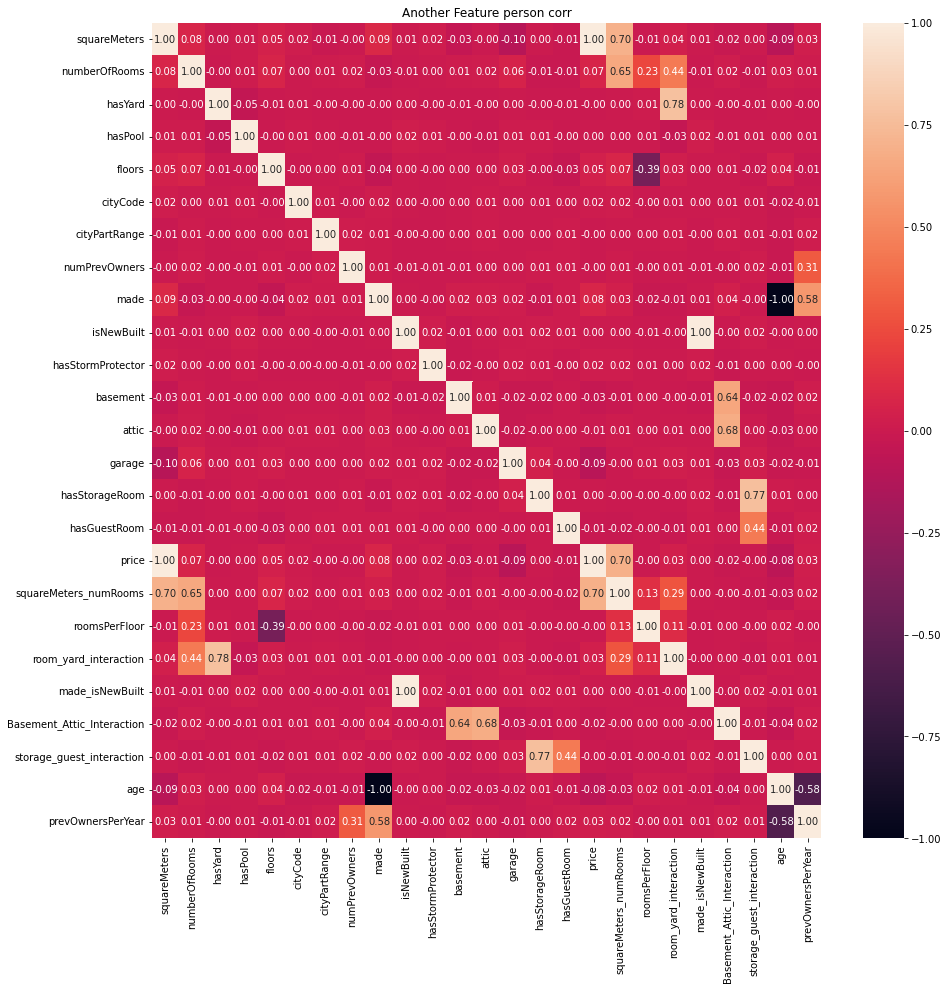

In [331]:
plt.figure(figsize=(15,15))
sns.heatmap(all_data.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("Another Feature person corr")
plt.show()

## 피쳐 제거(선택)

- 상관관계에서 가격 예측 시 필요한 특성만 사용하도록 하자

In [332]:
# 앞 선 EDA를 통해서 성능을 올리기 위해서 상관관계에서 price 예측과 연관 없는 특성 선택
# citycode 외에는 위에서 만든 파생변수들임 
feats_drop = ['cityCode','squareMeters_numRooms','roomsPerFloor','room_yard_interaction','made_isNewBuilt','Basement_Attic_Interaction','storage_guest_interaction','age','prevOwnersPerYear']
all_data = all_data.drop(feats_drop, axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47884 non-null  int64  
 1   numberOfRooms      47884 non-null  int64  
 2   hasYard            47884 non-null  int64  
 3   hasPool            47884 non-null  int64  
 4   floors             47884 non-null  int64  
 5   cityPartRange      47884 non-null  int64  
 6   numPrevOwners      47884 non-null  int64  
 7   made               47884 non-null  int64  
 8   isNewBuilt         47884 non-null  int64  
 9   hasStormProtector  47884 non-null  int64  
 10  basement           47884 non-null  int64  
 11  attic              47884 non-null  int64  
 12  garage             47884 non-null  int64  
 13  hasStorageRoom     47884 non-null  int64  
 14  hasGuestRoom       47884 non-null  int64  
 15  price              32730 non-null  float64
dtypes: float64(1), int64(1

## 데이터 나누기

In [333]:
# 정답의 결측 여부로 해결
X_sub = all_data[pd.isnull(all_data['price'])] # submisson용

# 훈련용
X = all_data[~pd.isnull(all_data['price'])] # ~ : 문자가 포함되어있지 않으면의 의미 / X = price에서 결측치를 포함하지 않는 all_data 파일
print(X.shape, X_sub.shape)
X.head() # Price 제거 필요

(32730, 16) (15154, 16)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [334]:
y = X['price']
X = X.drop( ['price'], axis=1 )
X_sub = X_sub.drop( ['price'], axis=1 )

In [335]:
print(X.shape, X_sub.shape, y.shape)

(32730, 15) (15154, 15) (32730,)


In [336]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22911, 15), (9819, 15), (22911,), (9819,))

# 베이스 모델 학습 및 평가

In [337]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lr_model = LinearRegression() # 선형회귀 
lr_model.fit(X_train,y_train)

# 모델 예측
y_pred = lr_model.predict(X_test)
y_pred.shape

(9819,)

In [338]:
# 모델 평가 함수

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def show_reg_metric(true, preds):
  mae   = mean_absolute_error(true, preds)
  mse   = mean_squared_error(true, preds)
  rmse  = np.sqrt( mse )
  msle  = mean_squared_log_error(true, preds)
  rmsle = np.sqrt( msle )
  r2    = r2_score(true, preds)
  print('-'*30)
  print(f'mae \t {mae:.3f}' )
  print(f'mse \t {mse:.3f}' )
  print(f'rmse \t {rmse:.3f}' )
  print(f'msle \t {msle:.3f}' )
  print(f'rmsle \t {rmsle:.3f}' )
  print(f'r2 \t {r2:.3f}' )
  print('-'*30)

show_reg_metric(y_test, y_pred)

------------------------------
mae 	 9654.709
mse 	 34683908480.180
rmse 	 186236.163
msle 	 0.005
rmsle 	 0.069
r2 	 0.996
------------------------------


In [339]:
# 테스트 데이터로 예측
sub_y_pred = lr_model.predict(X_sub) 

submission['price'] = sub_y_pred
submission.to_csv('submission.csv', index=False) # 파일로 저장

# 현재기준 ( 2/9 ) 100위권 이내 들어감

# 모델 비교

In [340]:
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit

def RMSE(y, y_pred):
    rmse =  np.sqrt(mean_squared_error(y, y_pred))
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10) 
    # TimeSeriesSplit이라는 sklearn 라이브러리 함수를 사용한다. 
    # 입력 변수는 몇 번의 반복으로 교차검즘을 할 것인지 정하는 것이다. 
    # n_split 10을 입력함 => 10개의 훈련용 + 검증용 데이터셋을 만든다는 의미이다 
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(X_train1, y_train1)
        pred = clf.predict(X_test1)
        rmse = RMSE(y_test1, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSE: {r:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elstic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
#ada = AdaBoostRegressor() 
xgb = XGBRegressor()
lgbm = LGBMRegressor()

In [342]:
models = []
scores = []
for model in [lr, ridge, lasso, elstic, dt, rf, gb, xgb, lgbm]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 39.88it/s]


1 FOLDS: LinearRegression RMSE: 38956.9647
2 FOLDS: LinearRegression RMSE: 47766.2275
3 FOLDS: LinearRegression RMSE: 177288.3630
4 FOLDS: LinearRegression RMSE: 144433.2876
5 FOLDS: LinearRegression RMSE: 40259.2680
6 FOLDS: LinearRegression RMSE: 224914.7635
7 FOLDS: LinearRegression RMSE: 65109.5667
8 FOLDS: LinearRegression RMSE: 172571.3951
9 FOLDS: LinearRegression RMSE: 163335.4213
10 FOLDS: LinearRegression RMSE: 165089.4185

LinearRegression mean RMSE: 123972.4676


Ridge Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 56.76it/s]


1 FOLDS: Ridge RMSE: 38952.4540
2 FOLDS: Ridge RMSE: 47765.7162
3 FOLDS: Ridge RMSE: 177288.3759
4 FOLDS: Ridge RMSE: 144433.1829
5 FOLDS: Ridge RMSE: 40259.1679
6 FOLDS: Ridge RMSE: 224914.7585
7 FOLDS: Ridge RMSE: 65109.5532
8 FOLDS: Ridge RMSE: 172571.4021
9 FOLDS: Ridge RMSE: 163335.4291
10 FOLDS: Ridge RMSE: 165089.3786

Ridge mean RMSE: 123971.9419


Lasso Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 44.58it/s]


1 FOLDS: Lasso RMSE: 38955.7382
2 FOLDS: Lasso RMSE: 47765.7419
3 FOLDS: Lasso RMSE: 177288.3395
4 FOLDS: Lasso RMSE: 144433.1040
5 FOLDS: Lasso RMSE: 40258.9947
6 FOLDS: Lasso RMSE: 224914.7295
7 FOLDS: Lasso RMSE: 65109.4897
8 FOLDS: Lasso RMSE: 172571.5167
9 FOLDS: Lasso RMSE: 163335.4756
10 FOLDS: Lasso RMSE: 165089.1262

Lasso mean RMSE: 123972.2256


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 37.78it/s]


1 FOLDS: ElasticNet RMSE: 37884.4337
2 FOLDS: ElasticNet RMSE: 47521.3368
3 FOLDS: ElasticNet RMSE: 177316.4287
4 FOLDS: ElasticNet RMSE: 144311.6528
5 FOLDS: ElasticNet RMSE: 40139.8564
6 FOLDS: ElasticNet RMSE: 224911.4584
7 FOLDS: ElasticNet RMSE: 65101.9448
8 FOLDS: ElasticNet RMSE: 172603.0694
9 FOLDS: ElasticNet RMSE: 163372.6454
10 FOLDS: ElasticNet RMSE: 164963.2820

ElasticNet mean RMSE: 123812.6108


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  8.95it/s]


1 FOLDS: DecisionTreeRegressor RMSE: 40134.1657
2 FOLDS: DecisionTreeRegressor RMSE: 47572.0023
3 FOLDS: DecisionTreeRegressor RMSE: 254034.6290
4 FOLDS: DecisionTreeRegressor RMSE: 217968.9508
5 FOLDS: DecisionTreeRegressor RMSE: 208392.3305
6 FOLDS: DecisionTreeRegressor RMSE: 226322.4738
7 FOLDS: DecisionTreeRegressor RMSE: 268584.7255
8 FOLDS: DecisionTreeRegressor RMSE: 67177.6570
9 FOLDS: DecisionTreeRegressor RMSE: 3522.9714
10 FOLDS: DecisionTreeRegressor RMSE: 263135.6492

DecisionTreeRegressor mean RMSE: 159684.5555


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [01:08<00:00,  6.86s/it]


1 FOLDS: RandomForestRegressor RMSE: 40290.8794
2 FOLDS: RandomForestRegressor RMSE: 58594.1629
3 FOLDS: RandomForestRegressor RMSE: 201837.5867
4 FOLDS: RandomForestRegressor RMSE: 166619.7374
5 FOLDS: RandomForestRegressor RMSE: 56700.8048
6 FOLDS: RandomForestRegressor RMSE: 228088.5044
7 FOLDS: RandomForestRegressor RMSE: 106155.1790
8 FOLDS: RandomForestRegressor RMSE: 109112.7574
9 FOLDS: RandomForestRegressor RMSE: 108055.8720
10 FOLDS: RandomForestRegressor RMSE: 151295.5994

RandomForestRegressor mean RMSE: 122675.1084


GradientBoostingRegressor Cross Validations...: 100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


1 FOLDS: GradientBoostingRegressor RMSE: 44344.0103
2 FOLDS: GradientBoostingRegressor RMSE: 58860.4122
3 FOLDS: GradientBoostingRegressor RMSE: 212987.9957
4 FOLDS: GradientBoostingRegressor RMSE: 149100.0825
5 FOLDS: GradientBoostingRegressor RMSE: 54462.0953
6 FOLDS: GradientBoostingRegressor RMSE: 226134.6454
7 FOLDS: GradientBoostingRegressor RMSE: 69675.2835
8 FOLDS: GradientBoostingRegressor RMSE: 163442.8858
9 FOLDS: GradientBoostingRegressor RMSE: 148195.3196
10 FOLDS: GradientBoostingRegressor RMSE: 133725.1758

GradientBoostingRegressor mean RMSE: 126092.7906


XGBRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  7.89it/s]

[07:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:01,  5.53it/s]

[07:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:01,  4.03it/s]

[07:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:01,  3.14it/s]

[07:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:01<00:01,  2.56it/s]

[07:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  60%|██████    | 6/10 [00:02<00:01,  2.13it/s]

[07:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  70%|███████   | 7/10 [00:02<00:01,  1.83it/s]

[07:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  80%|████████  | 8/10 [00:03<00:01,  1.59it/s]

[07:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...:  90%|█████████ | 9/10 [00:04<00:00,  1.40it/s]

[07:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


1 FOLDS: XGBRegressor RMSE: 44218.9777
2 FOLDS: XGBRegressor RMSE: 55725.1685
3 FOLDS: XGBRegressor RMSE: 206728.3543
4 FOLDS: XGBRegressor RMSE: 148876.0543
5 FOLDS: XGBRegressor RMSE: 47538.4996
6 FOLDS: XGBRegressor RMSE: 225752.3778
7 FOLDS: XGBRegressor RMSE: 69352.6655
8 FOLDS: XGBRegressor RMSE: 168424.3094
9 FOLDS: XGBRegressor RMSE: 148921.2769
10 FOLDS: XGBRegressor RMSE: 140905.3308

XGBRegressor mean RMSE: 125644.3015


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]

1 FOLDS: LGBMRegressor RMSE: 51371.9133
2 FOLDS: LGBMRegressor RMSE: 55299.0245
3 FOLDS: LGBMRegressor RMSE: 178884.8680
4 FOLDS: LGBMRegressor RMSE: 147516.4069
5 FOLDS: LGBMRegressor RMSE: 50889.8674
6 FOLDS: LGBMRegressor RMSE: 226157.3591
7 FOLDS: LGBMRegressor RMSE: 73621.0428
8 FOLDS: LGBMRegressor RMSE: 167327.6525
9 FOLDS: LGBMRegressor RMSE: 158101.5564
10 FOLDS: LGBMRegressor RMSE: 171717.5896

LGBMRegressor mean RMSE: 128088.7280


In [343]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,123972.467606
1,Ridge,123971.941863
2,Lasso,123972.225605
3,ElasticNet,123812.610841
4,DecisionTreeRegressor,159684.555524
5,RandomForestRegressor,122675.108363
6,GradientBoostingRegressor,126092.790611
7,XGBRegressor,125644.301469
8,LGBMRegressor,128088.728050


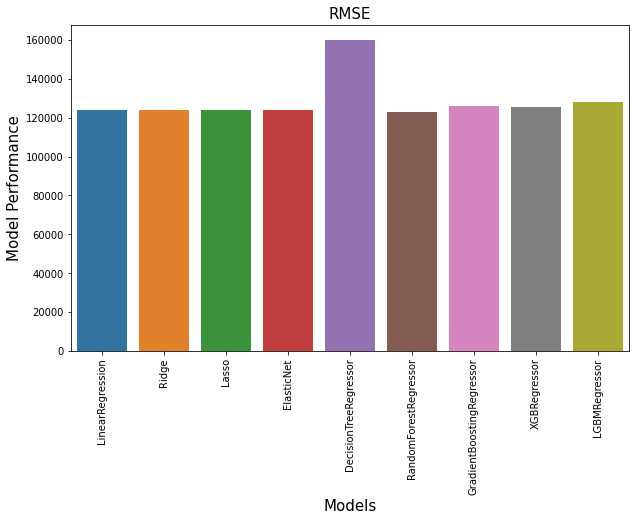

In [344]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSE', fontsize=15)
plt.show()

## 하이퍼 파라미터 튜닝 - Optuna

- Discussions 이나 bestScore 확인 시, XGBRegressor 사용 시 가장 성능이 좋게 나오는 것을 알 수 있다
- [공식문서](https://xgboost.readthedocs.io/en/stable/parameter.html)
- [XGBoost 개념 이해](https://wooono.tistory.com/97)
- [XGBoost 주요 파라미터](https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC)
- [XGBoost와 LightGBM 하이퍼파라미터 튜닝 가이드](https://psystat.tistory.com/131)

In [345]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [346]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [351]:
sampler = TPESampler(seed=42)

def objectiveRF(trial):

  param = {
  'objective':'reg:squarederror', #'reg:linear' 회귀
  'metric': 'rmse', 
  'max_depth':trial.suggest_int('max_depth',3,6),  
  'learning_rate': trial.suggest_float('learning_rate',0.01, 0.1),
  'n_estimators':trial.suggest_int('n_estimators',100, 3000),
  #'subsample':trial.suggest_float('subsample',0.5, 1),
  #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
  #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
  #'lambda': trial.suggest_float('lambda', 0.001, 1.0),
  #'alpha': trial.suggest_float('alpha', 0.001, 1.0),
  #'random_state': 42
  }
  model = RandomForestRegressor(**param)
  model.fit(X_train, y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=25)
  pred = model.predict(X_test)
  return RMSE(y_test, pred)


In [353]:
# RMSE가 최소가 되는 방향으로 학습을 진행
studyRF = optuna.create_study(direction='minimize', sampler=sampler)

# n_trials 지정
studyRF.optimize( objectiveRF, n_trials=50)

[I 2023-02-15 07:36:12,273] A new study created in memory with name: no-name-b81b8bed-2ae8-4c0d-9f50-26ff46e42567
[W 2023-02-15 07:36:12,278] Trial 0 failed with parameters: {'max_depth': 5, 'learning_rate': 0.02404167763981929, 'n_estimators': 552} because of the following error: TypeError("__init__() got an unexpected keyword argument 'objective'").
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-351-436227f7f9ed>", line 18, in objectiveRF
    model = RandomForestRegressor(**param)
TypeError: __init__() got an unexpected keyword argument 'objective'
[W 2023-02-15 07:36:12,280] Trial 0 failed with value None.


TypeError: ignored

In [354]:
print('study.best_params:', studyRF.best_trial.value)
print('Number of finished trials:', len(studyRF.trials))
print('Best trial:', studyRF.best_trial.params)

ValueError: ignored

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(studyRF)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(studyRF)

In [ ]:
X.shape, y.shape, X_sub.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

## 최종 제출 

In [ ]:
# 테스트 데이터로 예측
final_dt_model = XGBRegressor(**studyRF.best_params)
final_dt_model.fit(X, y)
sub_dt_pred = final_dt_model.predict(X_sub)

submission['price'] = sub_dt_pred
submission.to_csv('submission_final.csv', index=False) # 파일로 저장

# 참고 문헌

[캘리포니아 집값 예측](https://didalsgur.tistory.com/entry/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-Dataset-California-Housing-Prices-Kaggle)

[핸드온 머신러닝](https://data-analysis-expertise.tistory.com/112)

[Boston 예측](https://velog.io/@wltn39/보스턴-주택가격-예측)

[AUTOKHAJI- 집값 예측 Stage1 : 데이터 전처리](https://dacon.io/codeshare/7477?dtype=recent)

[일반화선형회귀 : boston housing 집값 예측하기](http://docs.iris.tools/manual/IRIS-Usecase/ml/ML_boston_housing.html)

[LightGBM + Optuna로 top 10안에 들어봅시다.](https://dacon.io/en/codeshare/2876)

[Private_3위 Xgboost + Optuna](https://dacon.io/en/competitions/official/235986/codeshare/6991)